In [108]:
import pandas as pd
import os
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load Data

In [ ]:
data_train=pd.read_parquet("../../data/starter/raw/UNSW_NB15_training-set.parquet")
data_test=pd.read_parquet("../../data/starter/raw/UNSW_NB15_testing-set.parquet")

In [51]:
print("🔍 First 5 rows train:")
print(data_train.head())
print("🔍 First 5 rows test:")
print(data_test.head())

🔍 First 5 rows train:
        dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0  0.121478   tcp       -   FIN      6      4     258     172  74.087486   
1  0.649902   tcp       -   FIN     14     38     734   42014  78.473373   
2  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4  0.449454   tcp       -   FIN     10      6     534     268  33.373825   

          sload  ...  trans_depth  response_body_len  ct_src_dport_ltm  \
0  14158.942383  ...            0                  0                 1   
1   8395.112305  ...            0                  0                 1   
2   1572.271851  ...            0                  0                 1   
3   2740.178955  ...            0                  0                 1   
4   8561.499023  ...            0                  0                 2   

   ct_dst_sport_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  \
0        

In [52]:
print("\n📏 Dataset shape data traain:", data_train.shape)
print("\n📏 Dataset shape data test:", data_test.shape)



📏 Dataset shape data traain: (175341, 36)

📏 Dataset shape data test: (82332, 36)


In [53]:
print("\n🧹 Missing values per column data train:")
print(data_train.isnull().sum())
print("\n🧹 Missing values per column data test:")
print(data_test.isnull().sum())


🧹 Missing values per column data train:
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
is_sm_ips_ports      0
attack_cat           0
label                0
dtype: int64

🧹 Missing values per column data test:
dur                  0
proto                0
service              0
state    

In [54]:
print("\n⚡ Attack Distribution Train data :")
print(data_train['label'].value_counts())
print("\n⚡ Attack Distribution Test data :")
print(data_test['label'].value_counts())


⚡ Attack Distribution Train data :
1    119341
0     56000
Name: label, dtype: int64

⚡ Attack Distribution Test data :
1    45332
0    37000
Name: label, dtype: int64


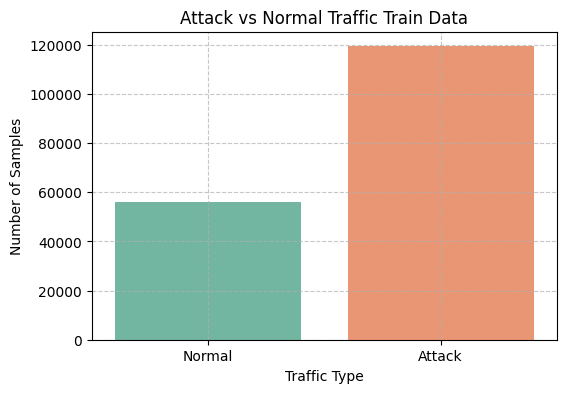

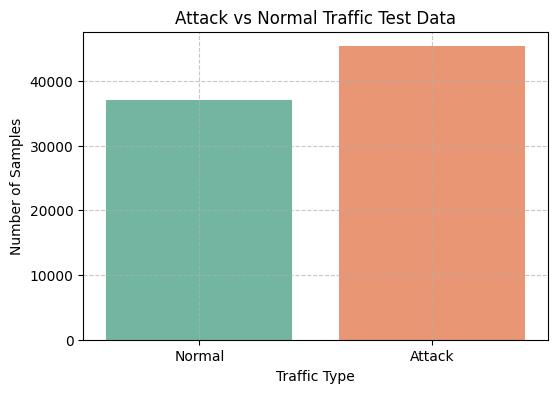

In [55]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data_train, palette='Set2')
plt.title('Attack vs Normal Traffic Train Data')
plt.xticks([0, 1], ['Normal', 'Attack'])
plt.ylabel('Number of Samples')
plt.xlabel('Traffic Type')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data_test, palette='Set2')
plt.title('Attack vs Normal Traffic Test Data')
plt.xticks([0, 1], ['Normal', 'Attack'])
plt.ylabel('Number of Samples')
plt.xlabel('Traffic Type')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [56]:
for col in data_train.columns:
    print(f"The values of {col}:",data_train[col].unique())

The values of dur: [0.121478 0.649902 1.623129 ... 3.71911  0.996503 1.557125]
The values of proto: ['tcp', 'udp', 'arp', 'ospf', 'icmp', ..., 'irtp', 'iso-tp4', 'netblt', 'trunk-2', 'cbt']
Length: 133
Categories (133, object): ['3pc', 'a/n', 'aes-sp3-d', 'any', ..., 'xnet', 'xns-idp', 'xtp', 'zero']
The values of service: ['-', 'ftp', 'smtp', 'snmp', 'http', ..., 'radius', 'pop3', 'dhcp', 'ssl', 'irc']
Length: 13
Categories (13, object): ['-', 'dhcp', 'dns', 'ftp', ..., 'smtp', 'snmp', 'ssh', 'ssl']
The values of state: ['FIN', 'INT', 'CON', 'ECO', 'REQ', 'RST', 'PAR', 'URN', 'no']
Categories (9, object): ['CON', 'ECO', 'FIN', 'INT', ..., 'REQ', 'RST', 'URN', 'no']
The values of spkts: [   6   14    8   12   10   62    2   24   28   30    1   16    4   36
   22  122   38   20   66   78   42   52   64   40   80    3   26  110
  106  360  354  366  352  108  362   18  342  332  336  308  322  328
  358  224  234  222  208  200   68   48   90  356   70  348  236   92
  240  452  450  368

In [89]:
data_train

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.121478,113,0,2,6,4,258,172,74.087486,1.415894e+04,...,0,0,1,1,0,0,0,0,6,0
1,0.649902,113,0,2,14,38,734,42014,78.473373,8.395112e+03,...,0,0,1,1,0,0,0,0,6,0
2,1.623129,113,0,2,8,16,364,13186,14.170161,1.572272e+03,...,0,0,1,1,0,0,0,0,6,0
3,1.681642,113,3,2,12,12,628,770,13.677108,2.740179e+03,...,0,0,1,1,1,1,0,0,6,0
4,0.449454,113,0,2,10,6,534,268,33.373825,8.561499e+03,...,0,0,2,1,0,0,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,119,2,3,2,0,114,0,111111.109375,5.066666e+07,...,0,0,24,13,0,0,0,0,5,1
175337,0.505762,113,0,2,10,8,620,354,33.612648,8.826286e+03,...,0,0,1,1,0,0,0,0,8,1
175338,0.000009,119,2,3,2,0,114,0,111111.109375,5.066666e+07,...,0,0,3,3,0,0,0,0,5,1
175339,0.000009,119,2,3,2,0,114,0,111111.109375,5.066666e+07,...,0,0,30,14,0,0,0,0,5,1


# Data Cleaning

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

### Convert Categorical Variables

In [59]:
label_encoders={}

for col in data_train.columns:
    if pd.api.types.is_categorical_dtype(data_train[col]):
        le=LabelEncoder()
        data_train[col]=le.fit_transform(data_train[col])
        data_test[col]=data_test[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
        label_encoders[col]=le
        print(f"Finish encoding: {col}")

Finish encoding: proto
Finish encoding: service
Finish encoding: state
Finish encoding: attack_cat


In [109]:
with open('../../resources/data_preprocessing/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)


### Normalisation

In [68]:
x,y=data_train.drop(columns=["label"]),data_train["label"]

In [ ]:
scaler=StandardScaler()
x_norm=scaler.fit_transform(x)

In [106]:
pd.DataFrame(x_norm).to_csv("../../data/starter/preprocessed/x_norm.csv")
pd.DataFrame(y).to_csv("../../data/starter/preprocessed/y.csv")


In [110]:
with open('../../resources/data_preprocessing/scaler_norm.pkl', 'wb') as f:
    pickle.dump(scaler, f)

### Split the data into training and validation

In [80]:
x_train,x_val,y_train,y_val=train_test_split(
    x,y,test_size=.2,random_state=42,stratify=y
)

In [ ]:
print(x_train.shape, y_val.shape)


(140272, 35) (35069,)


In [107]:
pd.DataFrame(x_train).to_csv("../../data/starter/train_val_data/x_train.csv")
pd.DataFrame(x_val).to_csv("../../data/starter/train_val_data/x_val.csv")
pd.DataFrame(y_train).to_csv("../../data/starter/train_val_data/y_train.csv")
pd.DataFrame(y_val).to_csv("../../data/starter/train_val_data/y_val.csv")


# Exploratory Data Analysis (EDA)

In [ ]:
print(data_train.describe())

                 dur          proto        service          state  \
count  175341.000000  175341.000000  175341.000000  175341.000000   
mean        1.359389     109.606675       1.618920       2.355176   
std         6.480248      22.352601       2.305151       0.867942   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000008     113.000000       0.000000       2.000000   
50%         0.001582     113.000000       0.000000       2.000000   
75%         0.668069     119.000000       2.000000       3.000000   
max        59.999989     132.000000      12.000000       8.000000   

               spkts          dpkts        sbytes        dbytes  \
count  175341.000000  175341.000000  1.753410e+05  1.753410e+05   
mean       20.298664      18.969591  8.844844e+03  1.492892e+04   
std       136.887597     110.258271  1.747656e+05  1.436542e+05   
min         1.000000       0.000000  2.800000e+01  0.000000e+00   
25%         2.000000       0.000000  1.1400

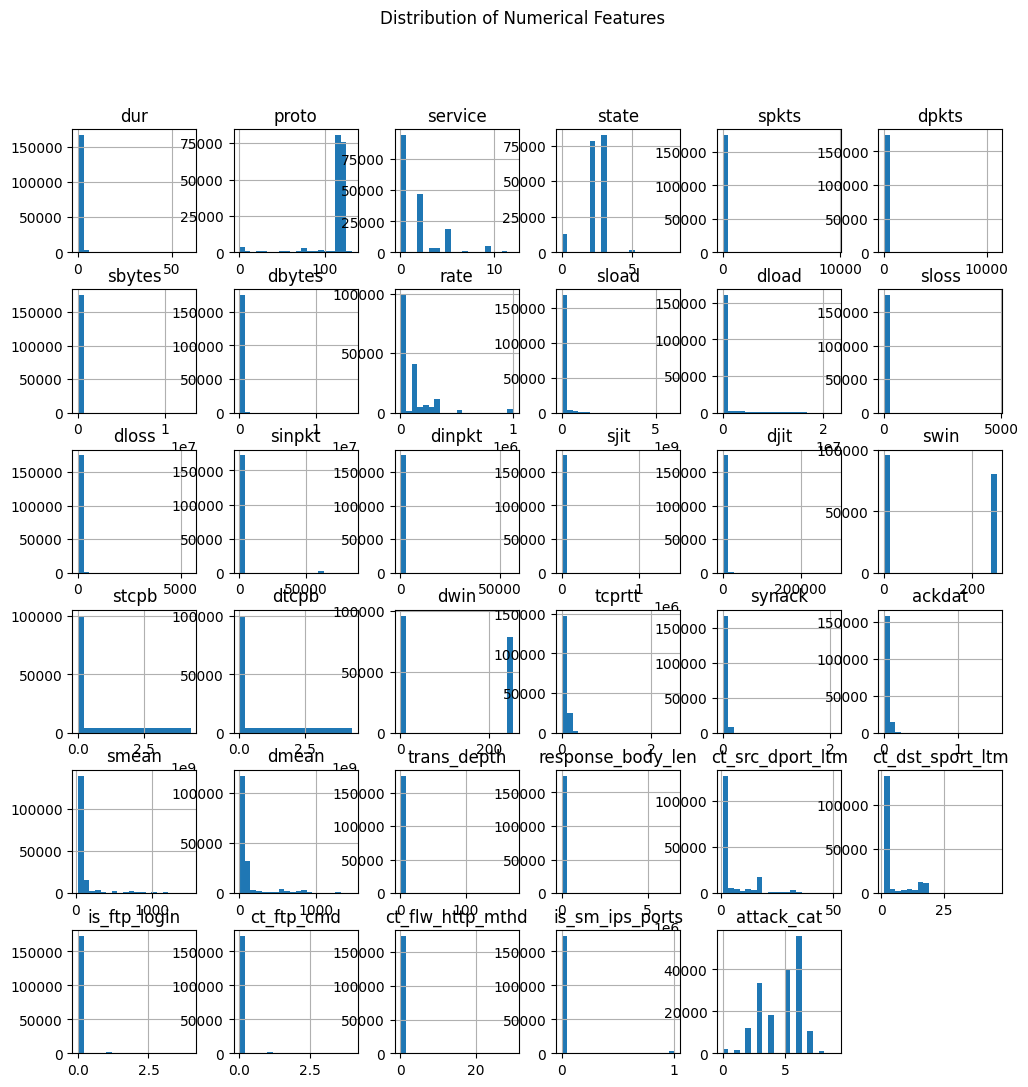

In [104]:
data_train[data_train.drop(columns=["label"]).columns].hist(bins=20, figsize=(12, 12))
plt.suptitle("Distribution of Numerical Features")
plt.show()

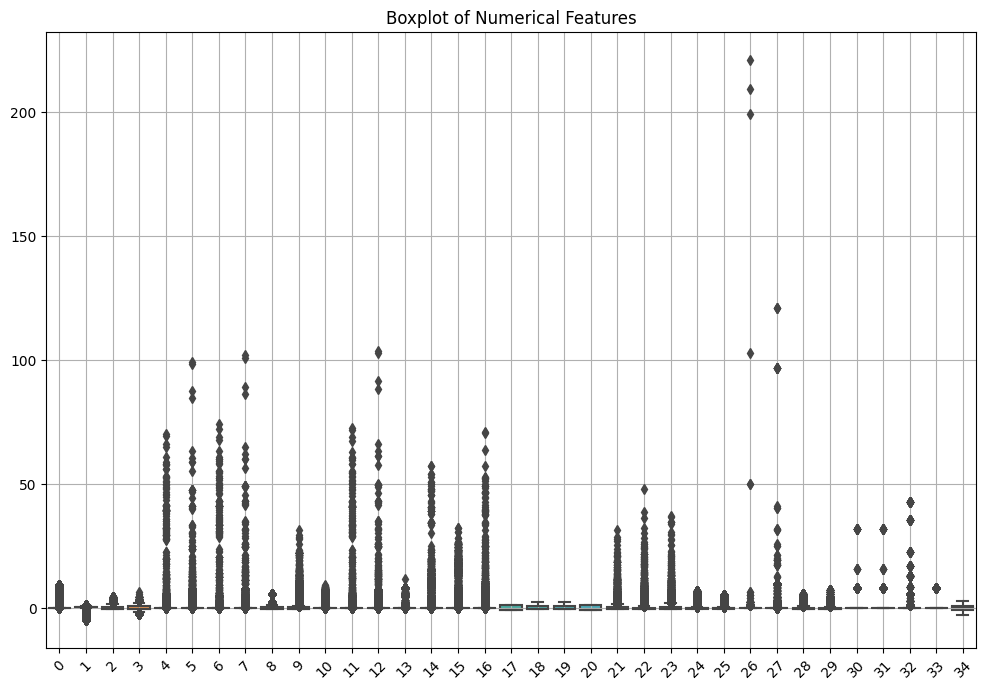

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=x_norm)
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.grid(True)
plt.show()

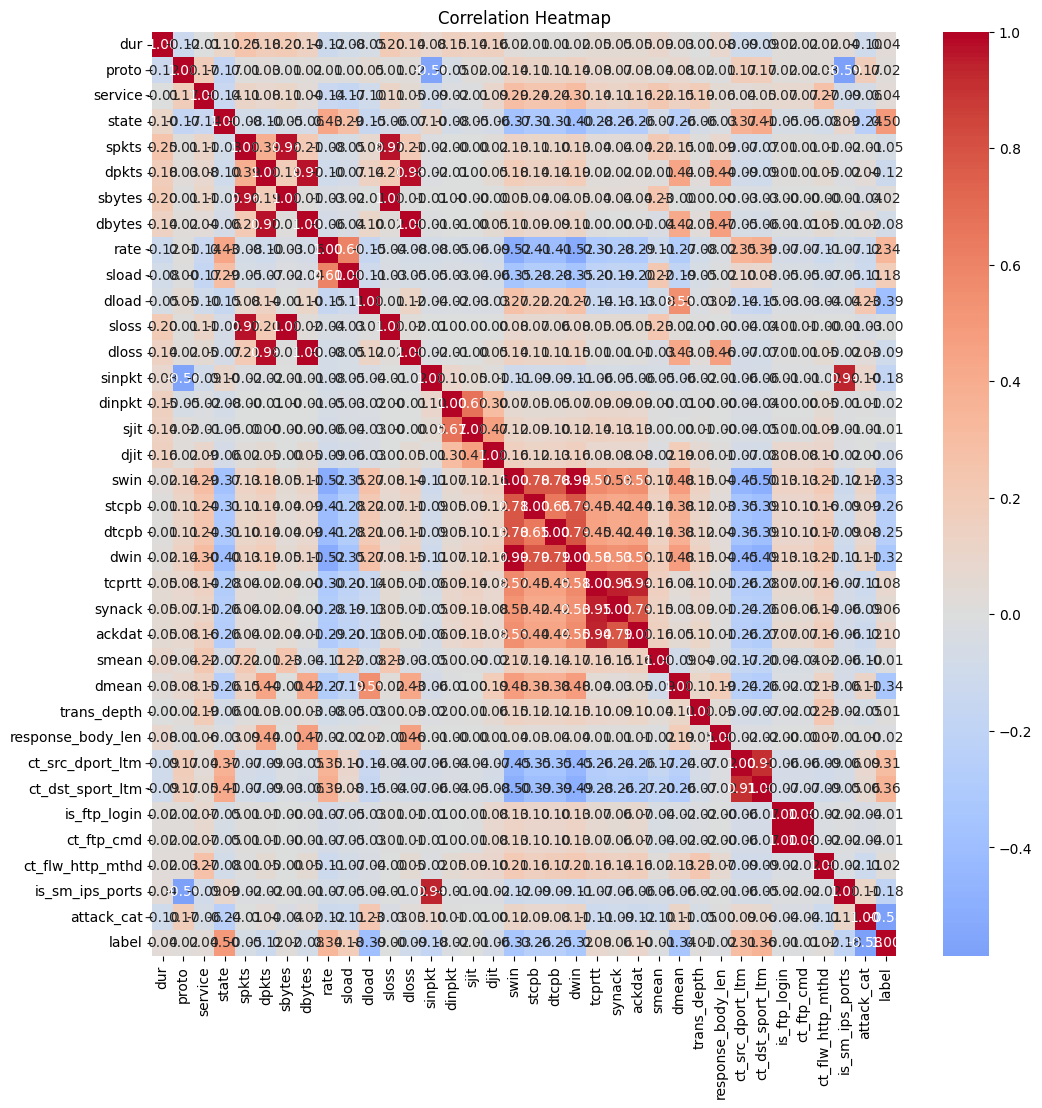

In [ ]:
corr_matrix = data_train.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
sns.pairplot(data_train, hue='label', vars=data_train.columns.drop("label"))
plt.suptitle("Pairplot of Features vs. Target Class", y=1.02)
plt.show()